In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax  
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

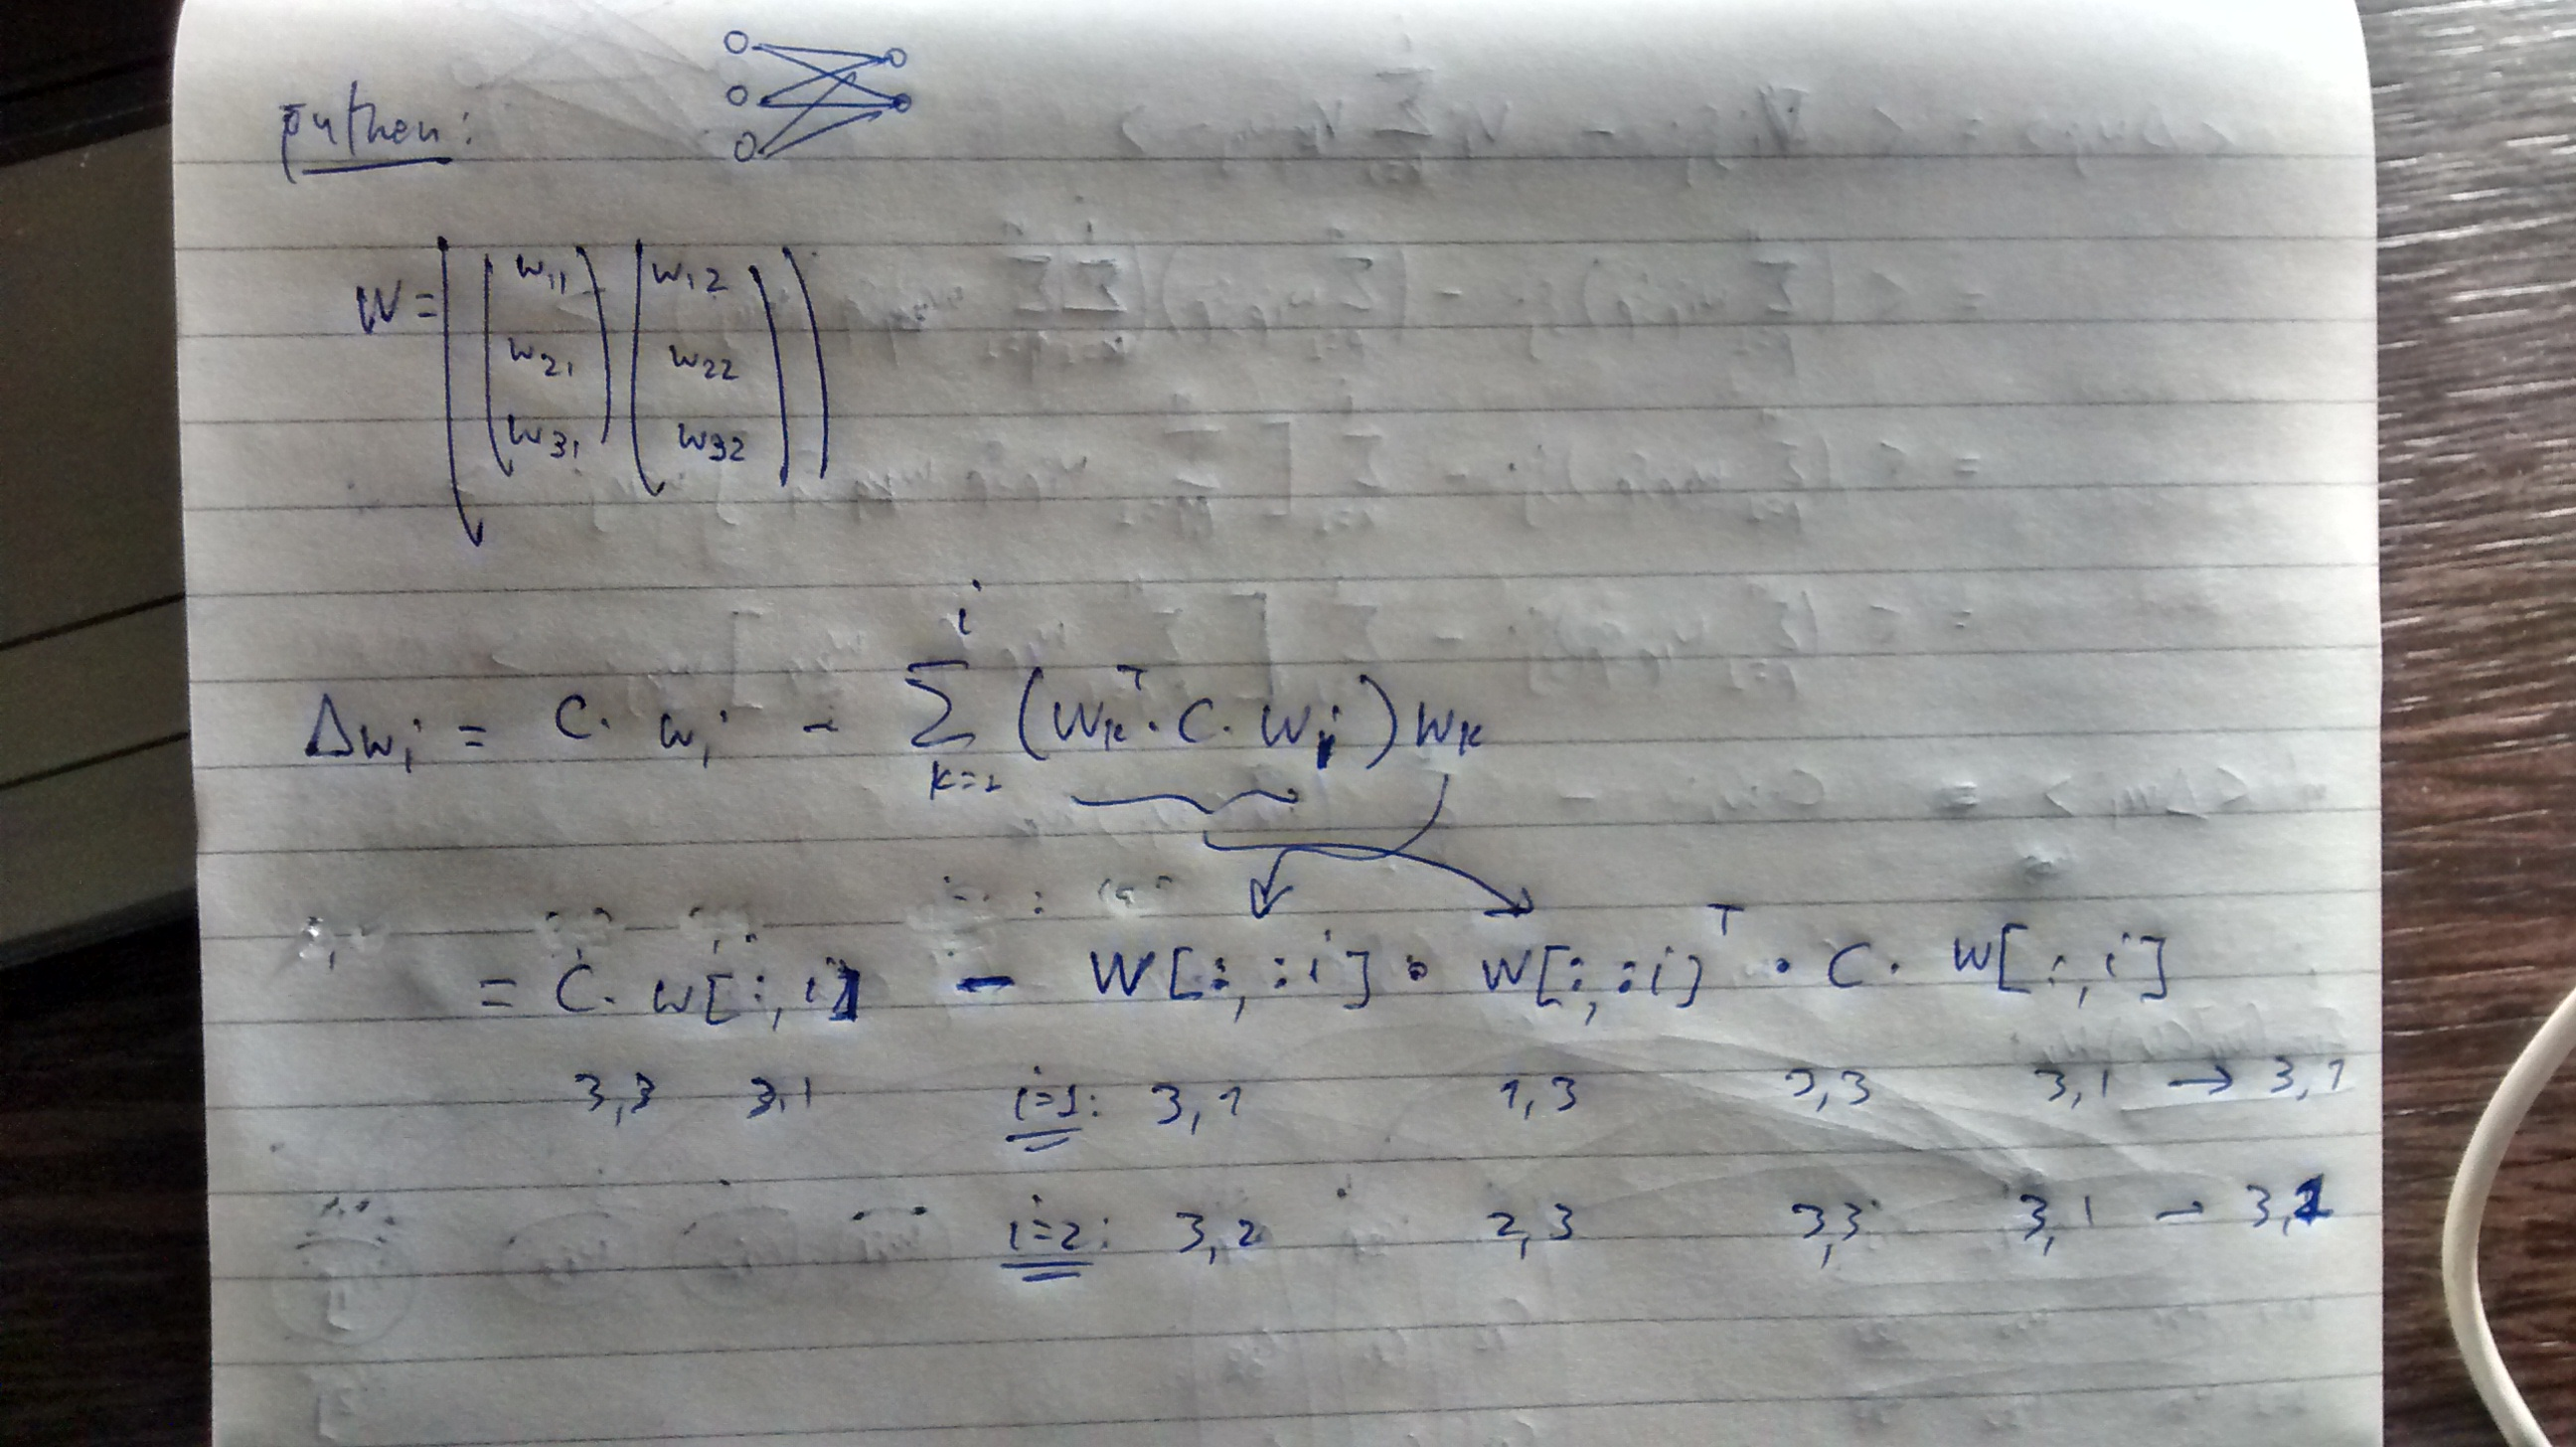

In [5]:
from IPython.display import Image
Image(filename='sxedio.jpg') 

# if you want to open it, in new window...
#from PIL import Image
#jpgfile = Image.open("sxedio.jpg")
#jpgfile.show()

In [11]:
def generate_random(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

def two_three_d_blobs(n):
    '''
    Generate 2 blobs, of n 3d data points each, then plot them.
    '''
    
    # initialize data list
    data = []
    
    # configure 3d plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # define the scaler to make our data zero-mean.
    scaler = StandardScaler(with_std=False)
    
    # generate the 2 blobs 
    for c, m, vmin, vmax, i in [('r', 'o', np.random.uniform(1,10), np.random.uniform(1,10), 0), 
                                ('b', '^', np.random.uniform(1,10), np.random.uniform(1,10), 1)]:
        # generate the features-axis of the data points.
        x1 = generate_random(n, vmin, vmax)
        x2 = generate_random(n, vmin, vmax)
        x3 = generate_random(n, vmin, vmax)
        # keep blob (which is an array (n,3)) in a list called data.
        new_data = np.vstack((x1,x2,x3)).T # [x1;x2;x3].T -> (50,3)
        new_data_scaled = scaler.fit_transform(new_data) 
        data.append(new_data_scaled) # 1st pass [(50,3)], 2nd pass [(50,3), (50,3)]
        # plot the data points
        ax.scatter(new_data_scaled[:,0], 
                   new_data_scaled[:,1], 
                   new_data_scaled[:,2], 
                   c=c, marker=m)
        # SVD
        C = np.cov(new_data_scaled.T) # (3,50)dot(50,3)=(3,3)
        eigenvals, eigenvecs = np.linalg.eig(C) # eval[i] corresponds to evec[:,i] 
        # plot also the eigenvecs
        for i in range(len(eigenvecs)):
            x1axis = [0]
            x2axis = [0]
            x3axis = [0]
            x1axis.append(eigenvecs[0,i])
            x2axis.append(eigenvecs[1,i])
            x3axis.append(eigenvecs[2,i])
            ax.plot(x1axis, 
                    x2axis, 
                    x3axis, 
                    c = c) # 3 eigenvectors for the 1st -red- blob and 3 for the 2nd -blue- blob
    
    # set labels 
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')

    plt.show()
    
    return data, eigenvals, eigenvecs, C

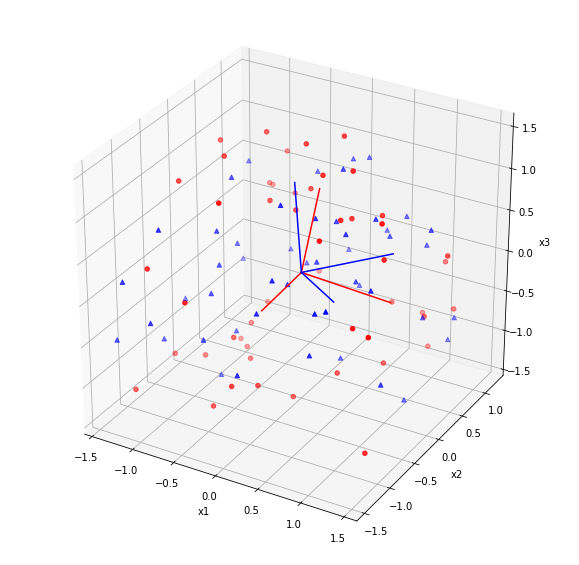

In [12]:
np.random.seed(1)

# let's create 2 blobs, each with 50 data points.
data, eigenvals, eigenvecs, C = two_three_d_blobs(50)

Notice the 2 blobs (red and blue), the 3 eigenvectors.

In [36]:
# my first 10 data points of the first blob
print ('1st blob:\n', data[0][:10])
print (data[0].shape)
# and of the second blob
print ('2nd blob:\n', data[1][:10])
print (data[0].shape)

1st blob:
 [[-0.85967526 -0.08636254  1.20919987]
 [-1.00821937 -1.28255587  0.43075119]
 [-0.75183943  0.13896088 -1.22766128]
 [-0.31699324 -1.02769253  1.26625675]
 [-0.17721304  0.18041972  0.61510791]
 [ 0.21054201  0.48192526  1.45156564]
 [-0.11599344 -1.14887622 -0.80040714]
 [ 0.61018092 -0.2979629  -0.89650636]
 [-0.70218021  0.46729886  1.27487784]
 [ 1.13673874 -0.29762638  0.63127126]]
(50, 3)
2nd blob:
 [[-0.73747559 -0.3932507   0.08776425]
 [ 0.5993869  -0.13218054  0.69738893]
 [-0.89223137  0.18964507  0.00615283]
 [ 0.15748275  0.04069289  0.15130286]
 [ 1.21462676  1.06512238 -0.7802845 ]
 [ 0.87955119  1.04486412  0.03912378]
 [-0.77141526 -0.38001019  0.48299038]
 [-0.08075674  1.16598164  0.7775409 ]
 [ 0.26246462 -0.98090444  0.49675456]
 [ 0.83100554 -1.11044583  0.34164879]]
(50, 3)


In [37]:
# check that my data in indeed scaled to zero-mean.
print (np.mean(data[1][:,0]))
print (np.mean(data[1][:,1]))
print (np.mean(data[1][:,2]))
print (np.mean(data[0][:,0]))
print (np.mean(data[0][:,1]))
print (np.mean(data[0][:,2]))

-3.10862446895e-16
-7.1054273576e-17
-2.13162820728e-16
-1.45661260831e-15
-6.03961325396e-16
7.63833440942e-16


Ok. Both blobs are centered around (0,0,0).

In [38]:
# correlation matrix is the result of (3,50) dot (50,3) -> (3,3)
C

array([[ 0.65891259,  0.14028291,  0.02067523],
       [ 0.14028291,  0.71352316, -0.01481833],
       [ 0.02067523, -0.01481833,  0.42187545]])

In [39]:
eigenvals

array([ 0.82914075,  0.54839292,  0.41677753])

In [40]:
eigenvecs

array([[ 0.63626421,  0.75587056, -0.15436177],
       [ 0.77145962, -0.62448568,  0.12193313],
       [ 0.00423105,  0.19666556,  0.9804615 ]])

In [41]:
# principal component
index = np.argmax(eigenvals, axis=0)
pc = eigenvecs[:,index]
pc

array([ 0.63626421,  0.77145962,  0.00423105])

We expect Sanger's weights to converge to the two first principal components. The first is shown above.

We will implement the (3,2) network s.t. the sanger's weights are: 

\begin{equation*}
\mathbf{W} = \begin{vmatrix} 
w_{11} & w_{21} \\ 
w_{12} & w_{22} \\ 
w_{13} & w_{23} \\
\end{vmatrix}
\end{equation*}

$w_{ij}$ the weight from $j$ -> $i$.

Now, onto the Sanger's rule - the "matrix implementation"...

\begin{equation*}
dW_{i} = C * W_{i} - \sum_{k=1}^i (W_{k}^T * C * W_{i}) * W_{i}
\end{equation*}

, where <p>

- $dW_{i}$ the (3,1) matrix of weights from all the inputs $[X_{1}, X_{2}, X_{3}]$ to the output $V_{i}$ , <p>

$
\begin{equation*}
\mathbf{dW} = \begin{vmatrix} 
dw_{11} & dw_{21} \\ 
dw_{12} & dw_{22} \\ 
dw_{13} & dw_{23} \\
\end{vmatrix} \\
= \begin{vmatrix} 
dw_{1} & dw_{2} \\
\end{vmatrix}
\end{equation*}
$

- C is the matrix : 
$
\begin{equation*}
\mathbf{C} = \begin{vmatrix} 
X_{1}^T * X_{1} & X_{1}^T * X_{2} & X_{1}^T * X_{3}  \\ 
X_{2}^T * X_{1} & X_{2}^T * X_{2} & X_{2}^T * X_{3}  \\
X_{3}^T * X_{1} & X_{3}^T * X_{2} & X_{3}^T * X_{3}  \\
\end{vmatrix} \\
= \begin{vmatrix} 
X_{1}^2 & X_{1}^T * X_{2} & X_{1}^T * X_{3}  \\ 
X_{2}^T * X_{1} & X_{2}^2 & X_{2}^T * X_{3}  \\
X_{3}^T * X_{1} & X_{3}^T * X_{2} & X_{3}^2  \\
\end{vmatrix} \\
\end{equation*}
$

- $V_{i}$ , where $i = 1,2$ (the real number output units) and 
- $X_{j}$, where $j=1..3$ (the (50,1) input units). <p>

Again the Sanger's rule - the explicit implementation,

$
\begin{equation*}
dW_{ij} = V_{i}*X_{j} - V_{i}*(\sum_{k=1}^i V_{k}*W_{kj}) \\
= (\sum_{p=1}^3 W_{ip}*X_{p})*X_{j} - (\sum_{p=1}^3 W_{ip}*X_{p}) * \sum_{k=1}^i(\sum_{q=1}^3 W_{kq}*X_{q})*W_{kj}\\
= (\sum_{p=1}^3 W_{ip}*X_{p})*X_{j} - \sum_{k=1}^i (\sum_{p,q=1}^3 W_{ip}*X_{p}*W_{kq}*X_{q}) * W_{kj} \\
= (\sum_{p=1}^3 W_{ip}*C_{pj}) - \sum_{k=1}^i (\sum_{p,q=1}^3 W_{ip}*W_{kq}*C_{pq}) * W_{kj} \\
\end{equation*}
$

How did we go ftom the explicit implementation to the matrix implementation? 

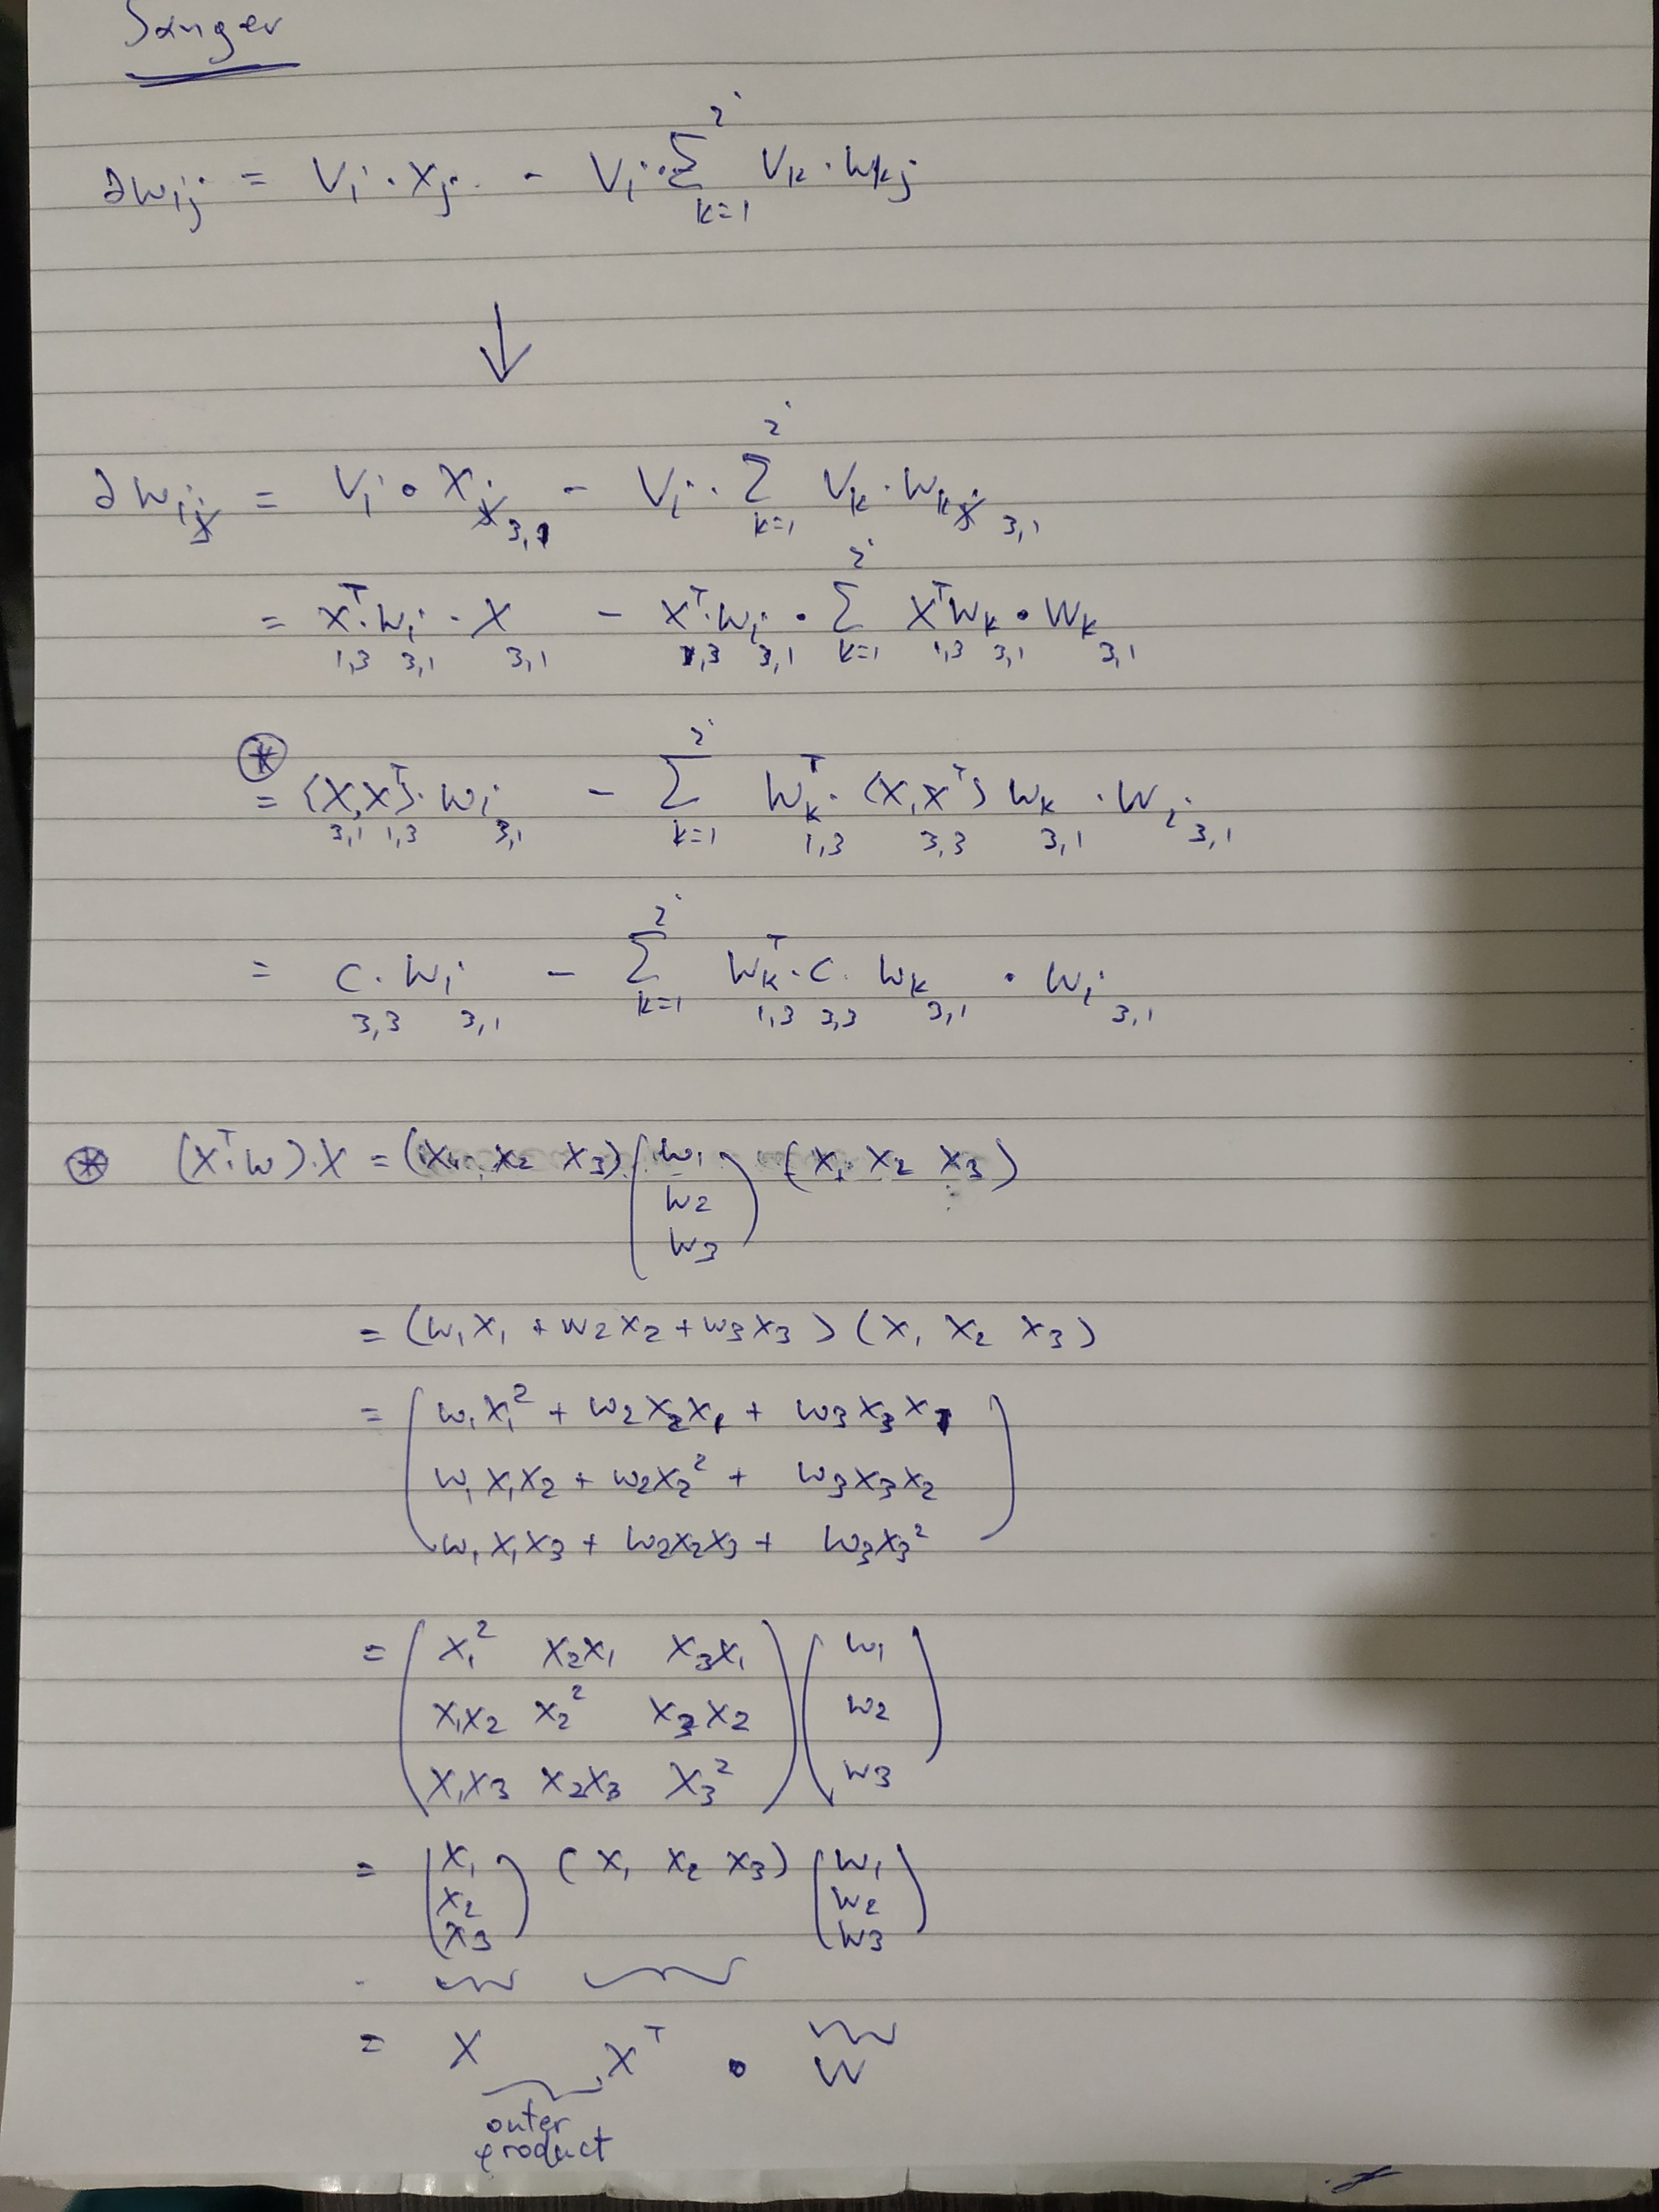

In [42]:
Image(filename='from_matrix_to_explicit.jpg') 

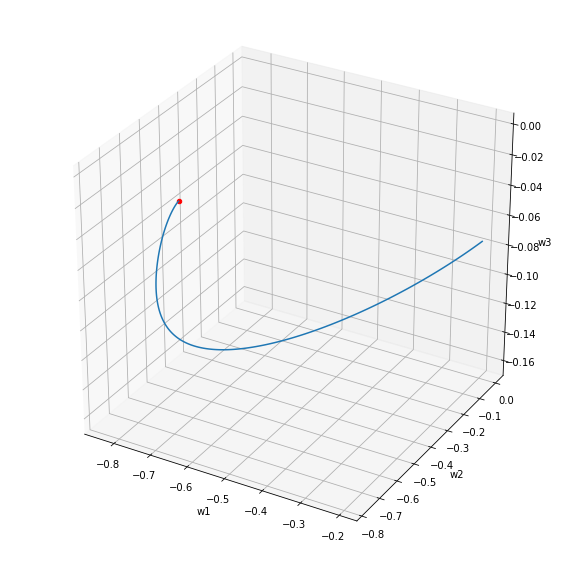

In [45]:
# Sanger's rule

# make results repeatable
np.random.seed(1000) 

# initialize randomly the weights, w. Here i'm planning my weights 
# s.t. i am creating a 3-input, 2-output net. 
w = np.random.normal(scale=0.25, size=(3,2))

# Set the threshold of tolerance, close to 0.
# This will be the flag point to end the loop,
# when the difference between new and the previous
# weights is almost zero. Then, we need also to 
# initialize the weights we will keep as flag, w_prev.
threshold = 1e-8
w_prev = np.ones((3,2))

# update rule
learning_rate = 0.001
listw1 = []
listw2 = []
listw3 = []
while np.linalg.norm(w - w_prev) > threshold:
    w_prev = w.copy()
    for i in range(2): # 2 output units
        rule = np.dot(C, w[:,i]) - np.dot(w[:,:i+1], np.dot(w[:,:i+1].T, np.dot(C, w[:,i])))
        # 3,3 dot 3,1 - 3,k dot k,3 dot 3,3 dot 3,1
        w[:,i] += learning_rate * rule # 3,1 = 3,1
        # keep a list of the w1,w2,w3 axis to plot next, that is 
        # the convergence of the sanger weights that correspond to the first 
        # output unit - w[:,0] - , to the principal component.    
        listw1.append(w_prev[0,0])
        listw2.append(w_prev[1,0])
        listw3.append(w_prev[2,0])
    
# append the last w_oja point to my lists
listw1.append(w[0,0])
listw2.append(w[1,0])
listw3.append(w[2,0])

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(listw1, listw2, listw3)    

ax.scatter(-pc[0], -pc[1], -pc[2], color='r')

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('w3')
plt.show()

Notice how the weights corresponding to the first output (the `w[:,0]`) converge to the principal component and the weight corresponding to the second output `(w[:,1]`) converges to the second largest component !!! Well in fact they converge to their negative vectors, which translates however into the same thing..

In [44]:
w

array([[-0.63626426, -0.75588219],
       [-0.77145958,  0.62449504],
       [-0.00423107, -0.19659108]])